<center> <h1>Homework 4 | DATA 5600</h1> </center>
<center> <h2>Multiple Linear Regression</h2> </center>
<center> <h3> Dallin Moore <h3> <center>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.outliers_influence import OLSInfluence

## Data and Description

Measuring body fat is not simple. One method requires submerging the body underwater in a tank and measuring the increase in water level. A simpler method for estimating body fat would be preferred. In order to develop such a method, researchers recorded age (years), weight (pounds), height (inches), and three body circumference measurements (around the neck, chest, and abdominal (all in centimeters)) for 252 men. Each man's percentage of body fat was accurately estimated by an underwater weighing technique (the variable brozek is the percentage of body fat). The hope is to be able to use this data to create a model that will accurately predict body fat percentage, by using just the basic variables recorded, without having to use the tank submerging method.

The data can be found in the BodyFat data set on Canvas. Download "BodyFat.txt", and put it in the same folder as this file.

#### 0. Replace the text "\< PUT YOUR NAME HERE \>" (above) with your full name.

#### 1. Read in the data set, and call the data frame "bodyfat". Print a summary of the data and make sure the data makes sense. **Remove the "row" column (which contains row numbers) from the data set.** [2 points]

In [2]:
bodyfat = pd.read_csv('BodyFat.txt', delimiter=' ', decimal='.', index_col=0)
bodyfat.head()
# removing the first column "row" not necessary as it is used as index

,brozek,age,weight,height,neck,chest,abdom
row,,,,,,,
1,12.6,23,154.25,67.75,36.2,93.1,85.2
2,6.9,22,173.25,72.25,38.5,93.6,83.0
3,24.6,22,154.00,66.25,34.0,95.8,87.9
4,10.9,26,184.75,72.25,37.4,101.8,86.4
5,27.8,24,184.25,71.25,34.4,97.3,100.0


#### 2. Create and print a scatterplot matrix of the data. [1 point]

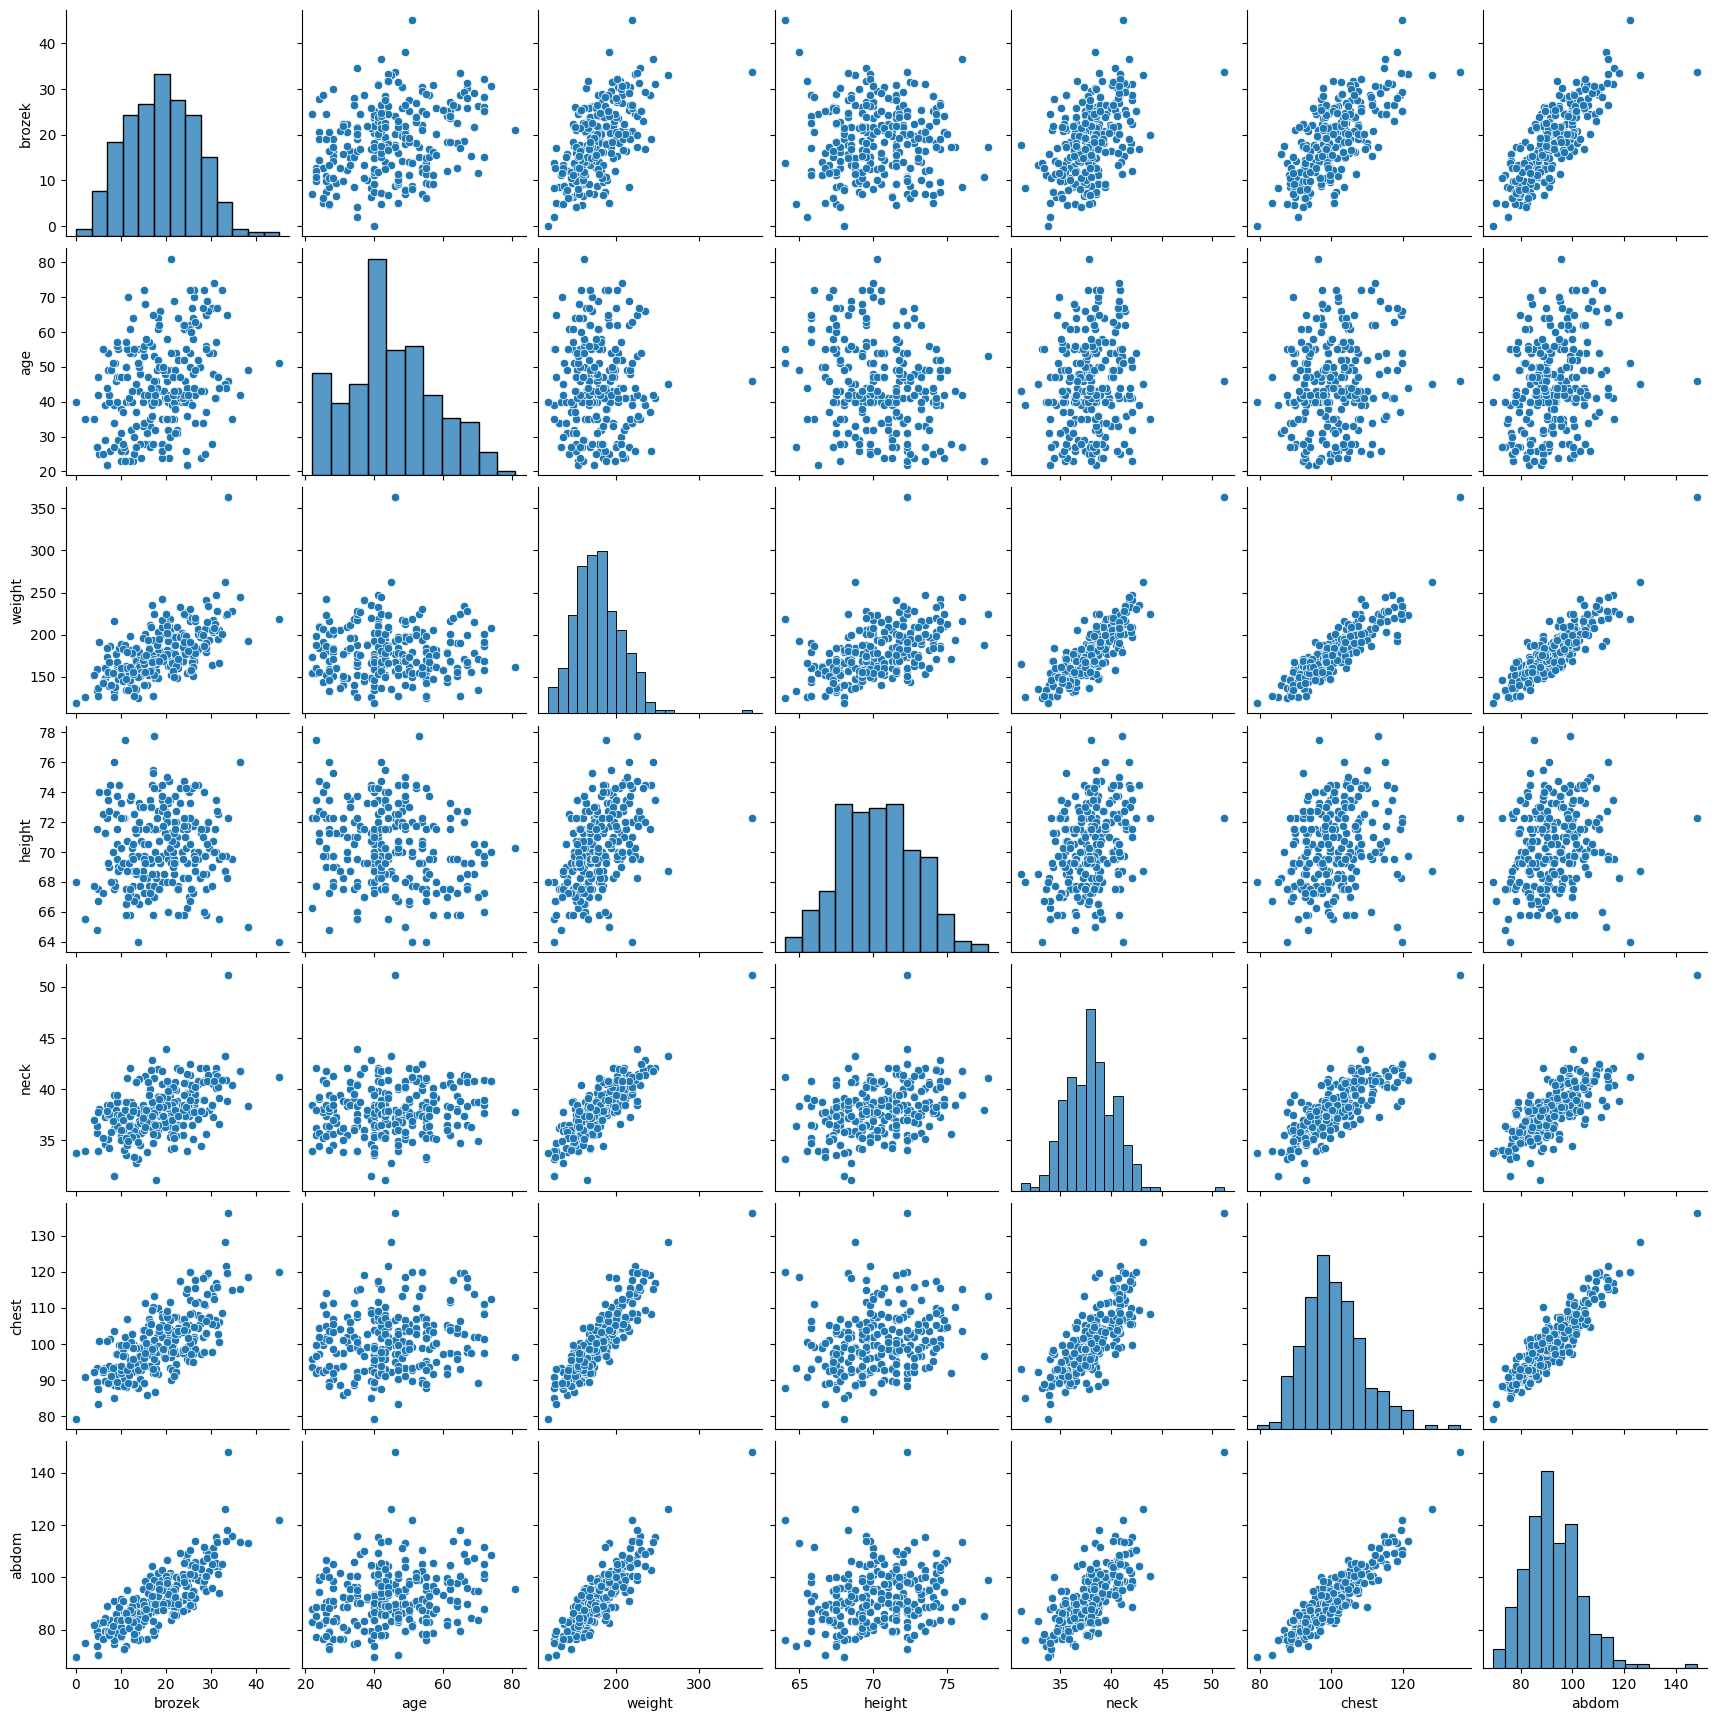

In [3]:
sns.pairplot(bodyfat)

#### 3. Based on the scatterplot matrix, briefly explain which variables you think will be "significant" for predicting brozek and which variables you think will *not* be helpful at predicting brozek. Explain how the scatterplot helped determine your answers. [3 points]

The columns "weight", "chest", and "abdomen" all look like they will be significant in predicting "brozek" because they all have a strong positive correlation. The variables "height", "age", and "neck" all appear to not have an extremely weak correlation as they just look like clouds.

#### 4. Create and print a correlation matrix (either numeric or color-coded). [1 point]

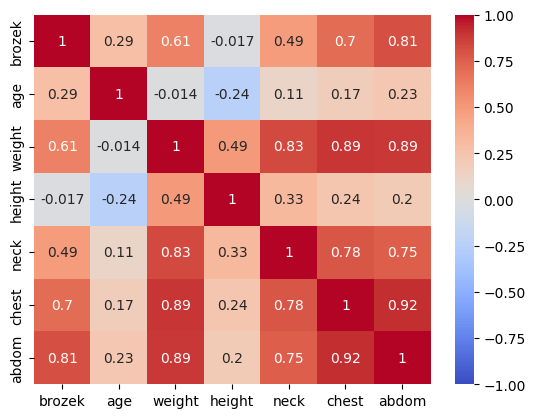

In [4]:
sns.heatmap(bodyfat.corr(), 
            cmap = 'coolwarm',  # color pallete
            annot = True,  # adds the correlation values in the boxes
            vmin = -1,  # start color legend at -1
            vmax = 1,  # stop color legend at 1
            # mask = np.triu(bodyfat.corr()) # remove the upper half of the plot
            )  
plt.show()

#### 5. Based on the scatterplot matrix and the correlation matrix, are their any pairs of variables that you suspect will cause a problem for the multicollinearity assumption? If so, which ones? [1 point]

Chest and abdomen have a super high correlation coefficient of 0.92, perhaps not surprising, but it will likely cause issues in the analysis. Weight, chest, neck and abdomen also all have correlation coefficients with eachother near or over 0.8 which could cause issues with multicollinearity.

#### 6. Fit a multiple linear regression model to the data (no transformations). Print a summary of the results. Save the residuals and fitted values to the `bodyfat` data frame. [2 points]

In [5]:
y = bodyfat['brozek']
X = sm.add_constant(bodyfat.iloc[:, 1:7])  # this is equivalent to above
mod = sm.OLS(y, X)
res = mod.fit()

bodyfat['residuals'] = res.resid
bodyfat['fittedvalues'] = res.fittedvalues

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 brozek   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     105.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           6.02e-65
Time:                        01:25:35   Log-Likelihood:                -708.22
No. Observations:                 251   AIC:                             1430.
Df Residuals:                     244   BIC:                             1455.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1009     14.130     -1.423      0.156     -47.934       7.732
age            0.0050      0.025      0.197      0.844      -0.045       0.055
weight        -0.0873      0.039     -2.251      0.025      -0.164      -0.011
height        -0.1400      0.152     -0.921      0.358      -0.439       0.159
neck          -0.4421      0.202     -2.189      0.030      -0.840      -0.044
chest          0.0005      0.091      0.005      0.996      -0.179       0.180
abdom          0.8754      0.079     11.048      0.000       0.719       1.031
==============================================================================
Omnibus:                        3.516   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.426
Skew:                          -0.021   Prob(JB):                        0.297
Kurtosis:                       2.520   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 7. Briefly comment on the "significance" of the variables: were you surprised by the results? Are there any variables that are significant that you think shouldn't be? Are there any variables that are not significant that you think should be? [1 point]


I was surprised that the greatest significance was with the abdomen variable considering that it looked to be so similar to chest yet chest does not have a significan P-value. It's interesting to see how significant neck is considering it was not promising when compared only to brozek.

#### 8. Briefly comment on the sign (+/-) of the coefficients for the variables. Are their any variables where the sign is the opposite of what you expected? [1 point]

I would have expected most of the signs to be positive, but the only significant positive coefficient is abdom, while all other significant coefficients are negative.

#### 9. Mathematically write out the *fitted* multiple linear regression model for this data set using the coefficients you found above (do not use betas). Do not use "X" and "Y" in your model - use variable names that are fairly descriptive. [3 points]


$
     \text{percent of body fat}_i = -20.100 + 0.005 \cdot \text{age}_i - 0.087 \cdot \text{weight}_i - 0.140 \cdot \text{height}_i - 0.442 \cdot \text{neck}_i + 0.001 \cdot \text{chest}_i + 0.875 \cdot \text{abdomen}_i
$


#### 10. *Assuming* the model assumptions are all met, how would you interpret the coefficient for Weight? [4 points]

For every additional pound of weight, the percentage of bodyfat (brozek) is expected to increase, on average, by 0.087 points, assuming all other variables in the model are held constant.

#### 11. Briefly explain what it means to "hold all else constant" when interpreting a coefficient. [1 point]

When interpreting the effect of one independent variable, weight in this case, on the dependent variable, percentage of body fat, in a multiple linear regression model, you assume that all other independent variables in the model remain unchanged. That way you can isolate just the variable you are interested in.

#### 12. Briefly explain what the F-test indicates, as reported in the model output from question 6. [1 point]

The F-statistic for the model is 105.6 and an associated p-value of incredibly close to 0. This indicates that the overall regression model is statistically significant. Because the null hypothesis for the F-test is that all regression coefficients are equal to zero, with our given values we can say that there is strong evidence to reject the null hypothesis and that there at least one of the independent variables in the model is significantly related to the dependent variable.

#### 13. Briefly interpret the *adjusted* R-squared, as reported in the model output from question 6. [1 point]

An adjusted R-squared value of 0.715 means that approximately 71.5% of the variability in the dependent variable, percent of body fat, is explained by the independent variables in the model, taking into account the number of predictors in the model, in this case 6 predictors.

### Questions 14-20 involve using diagnostics to determine if the linear regression assumptions are met. For each assumption, (1) perform appropriate diagnostics to determine if the assumption is violated, and (2) explain whether or not you think the assumption is violated and why you think that.

#### 14. (L) The X's vs Y are linear (use the residual vs. predictor plots, partial regression plots, and one other diagnostic tool of your choice). [2 points]


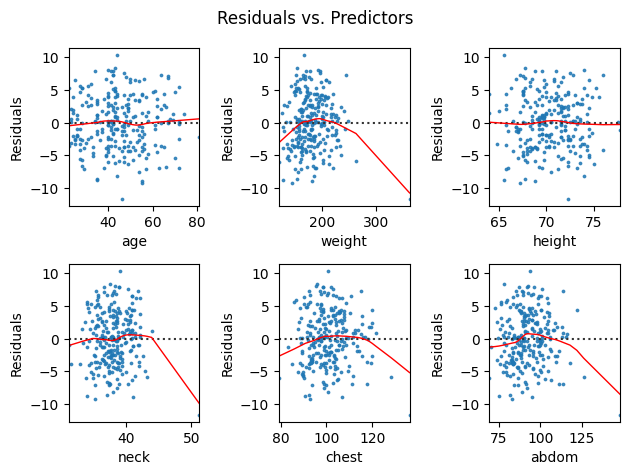

In [6]:
# residual vs. predictor plots
def res_vs_pred(variable, ax):
    sns.residplot(x = bodyfat[variable], 
                  y = bodyfat['residuals'],
                  lowess = True,
                  scatter_kws = {'s': 3},
                  line_kws = {'color': 'red', 'lw': 1},
                  ax = ax)
    ax.set_xlabel(variable)
    ax.set_ylabel("Residuals")

fig, axes = plt.subplots(2, 3)
plt.suptitle("Residuals vs. Predictors")
res_vs_pred("age", axes[0, 0])
res_vs_pred("weight", axes[0, 1])
res_vs_pred("height", axes[0, 2])
res_vs_pred("neck", axes[1, 0])
res_vs_pred("chest", axes[1, 1])
res_vs_pred("abdom", axes[1, 2])
fig.tight_layout()
plt.show()

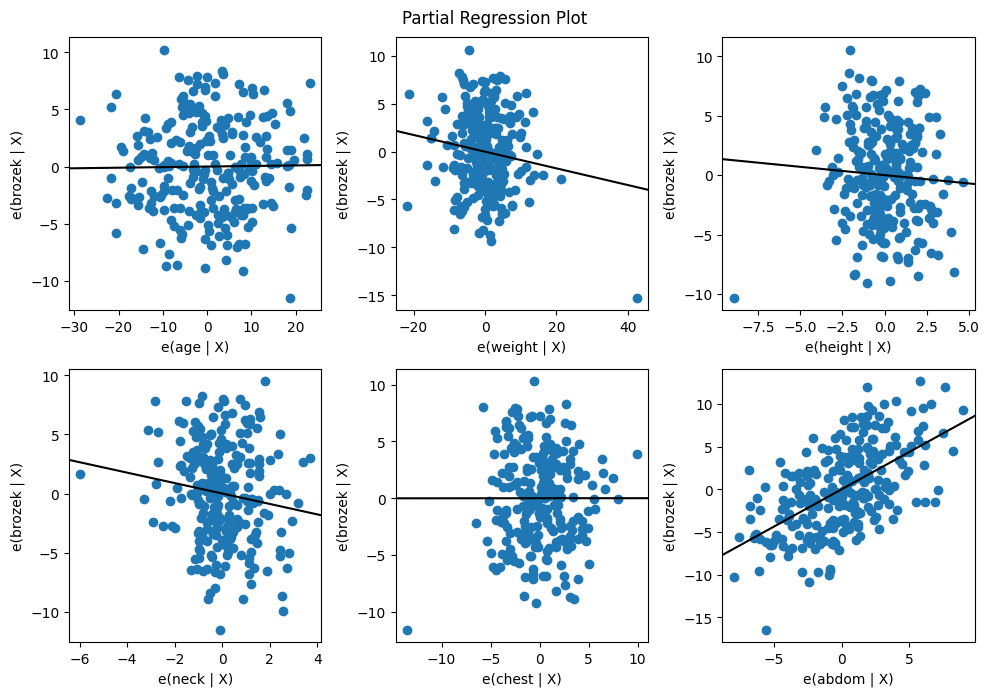

In [7]:
# partial regression plots
fig = plt.figure(figsize = (10,10))
sm.graphics.plot_partregress_grid(res, 
                                  exog_idx = list(bodyfat.columns[1:7]), 
                                  grid = (3, 3), 
                                  fig = fig)
fig.tight_layout()
plt.show()

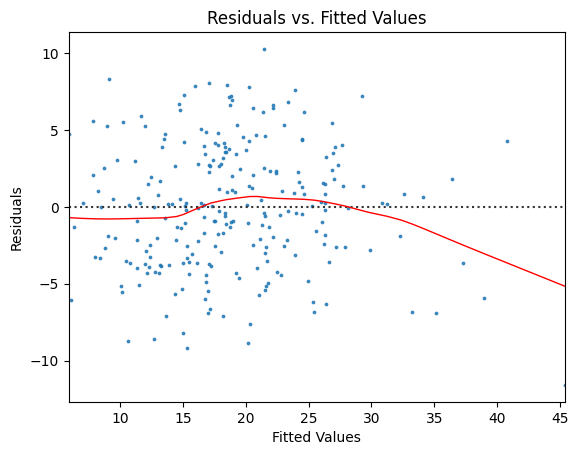

In [8]:
# residual vs. fitted values plot
sns.residplot(x = bodyfat['fittedvalues'], 
              y = bodyfat['residuals'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

The residuals vs predictors plot shows that there is an outlier that is bringing the line down. Same with the residuals vs fitted values. 

The residuals vs predictors plot, the red line is mostly straight but dips far down at the right end. This suggests that the relationship between the independent variable and the dependent variable is generally linear, but there are some high values of the independent variables (neck, weight, chest, abdoment) that are associated with much lower values of the dependent variable (percentage of body fat) than expected. 

In the partial regression plot, there is again an outlier visible in the neck, height and weight plots. The slope of the line for age and chest is mostly straight meaning that there is not much of a relationship (close to zero).


#### 15. (I) The residuals are independent (no diagnostic tools - just think about how the data was collected and briefly write your thoughts) [1 point]

Based on the informaiton provided, it appears that the data was collected independently for each individual. Researchers recorded age, weight, height, and body circumference measurements for 252 men, and each man's body fat percentage was estimated using an underwater weighing technique. There is no indication that the measurements of one individual would affect the measurements of another. 

Based on the information, it also appears that the observations come from a random sample which would lead to  independant residuals.

#### 16. (N) The residuals are normally distributed and centered at zero (use all four diagnostic tools). [2 points]

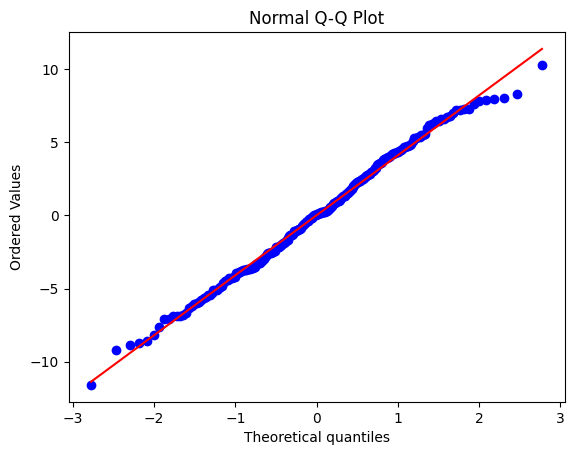

In [9]:
# Diagnostic 1 - Normality of Residuals
stats.probplot(res.resid, plot = plt)
plt.title("Normal Q-Q Plot")
plt.show()

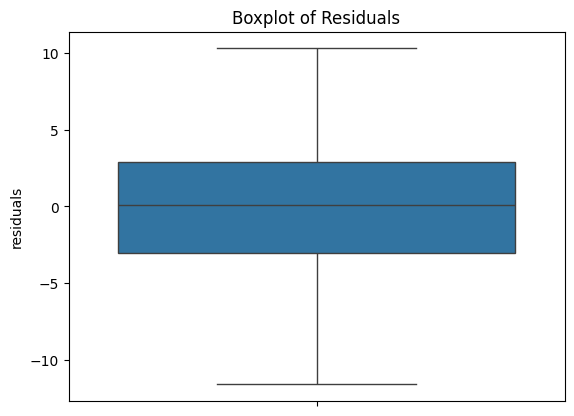

In [10]:
# Diagnostic 2 - Boxplot of Residuals
sns.boxplot(bodyfat['residuals'])
plt.title("Boxplot of Residuals")
plt.show()

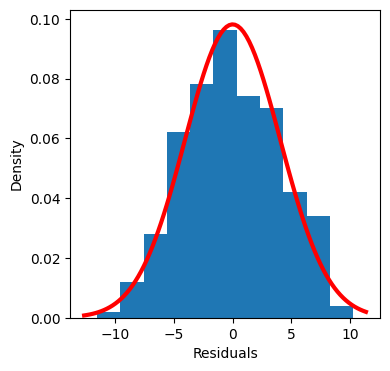

In [11]:
# Diagnostic 3 - Histogram of Residuals
fig = plt.figure(figsize = (4, 4))

# plot histogram (density = True so that it's on the same scale as the normal distribution)
plt.hist(bodyfat['residuals'], 
         density = True, 
         bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(bodyfat['residuals'])
sd = np.std(bodyfat['residuals'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x,
         stats.norm.pdf(x, mean, sd), 
         color = 'r',
         lw = 3)
plt.show()

In [12]:
# Diagnostic 4 - Shapiro-Wilk Test
stats.shapiro(bodyfat['residuals'])

ShapiroResult(statistic=0.9941575147125982, pvalue=0.44317858667634674)

The histogram, the boxplot, and the Q-Q plot all show that the data is linear, however the for the Shapiro-Wilks Test, since the p-value is greater than 0.05, we fail to reject the null hypothesis. With just one of the four tests suggesting it's not linear we won't assume that it is not.

#### 17. (E) The residuals have equal/constant variance across all values of X (only one diagnostic tool). [2 points]

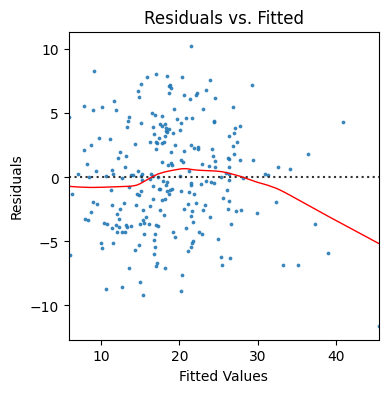

In [13]:
# Residuals vs. Fitted Values Plot
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = bodyfat['fittedvalues'], 
              y = bodyfat['residuals'],
              lowess = True,
              scatter_kws = {'s': 3},
              line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

The data is roughly homoscedastic because it has roughly equal variance as the fitted values increase.

#### 18. (A) The model describes all observations (i.e., there are no influential points) (use the DFBETAS and DFFITS). [2 points]

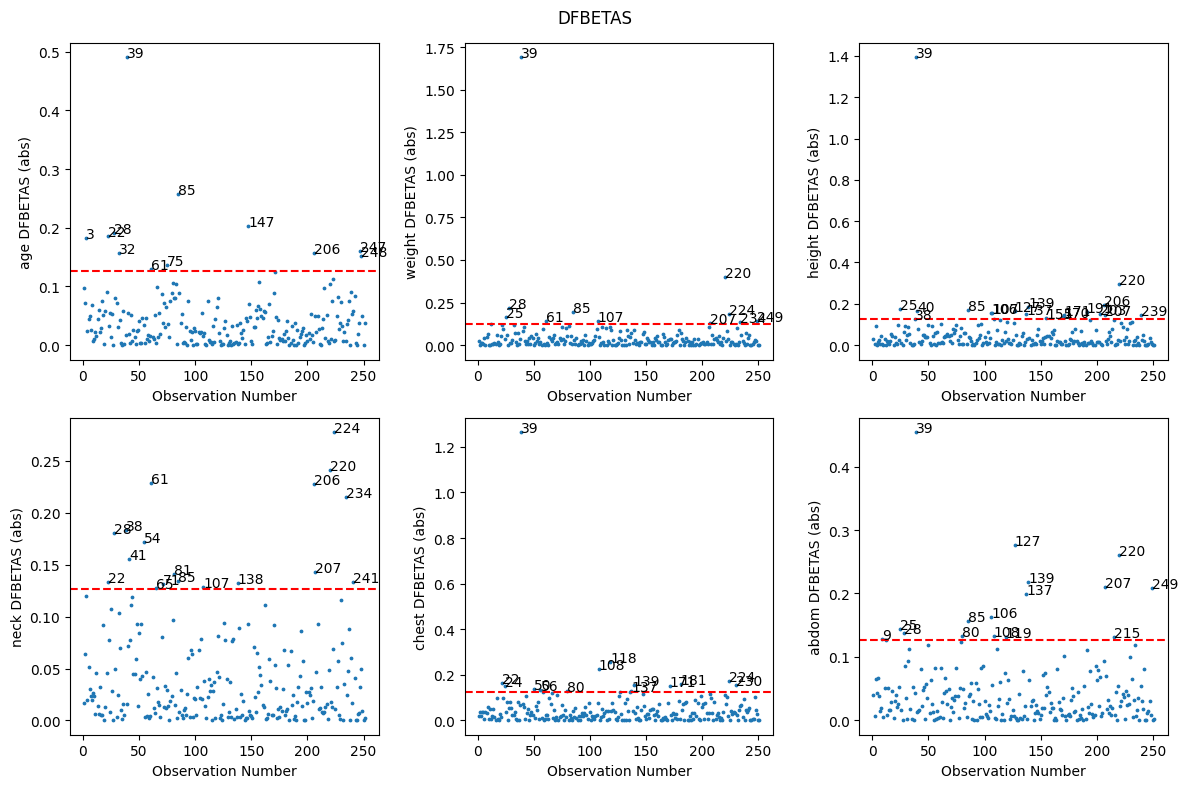

In [19]:
# DFBETAS
def plot_dfbetas(column, ax, label_level = 2 / np.sqrt(len(bodyfat))):
    idx = res.model.exog_names.index(column)
    bodyfat['dfbetas_' + column] = res.get_influence().dfbetas[:, idx]

    ax.set_ylabel(column + " DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(bodyfat.index, np.abs(bodyfat['dfbetas_' + column]), s = 3)
    ax.axhline(y = label_level, color = 'r', linestyle = 'dashed')

    # optional: label outliers
    outliers = bodyfat[np.abs(bodyfat['dfbetas_' + column]) > label_level]
    for i in list(outliers.index):
        ax.annotate(str(i), (i, np.abs(bodyfat['dfbetas_' + column][i])))
    
fig, axes = plt.subplots(2, 3, figsize = (12, 8))
plt.suptitle("DFBETAS")
plot_dfbetas("age", axes[0, 0])
plot_dfbetas("weight", axes[0, 1])
plot_dfbetas("height", axes[0, 2])
plot_dfbetas("neck", axes[1, 0])
plot_dfbetas("chest", axes[1, 1])
plot_dfbetas("abdom", axes[1, 2])

fig.tight_layout()
plt.show()


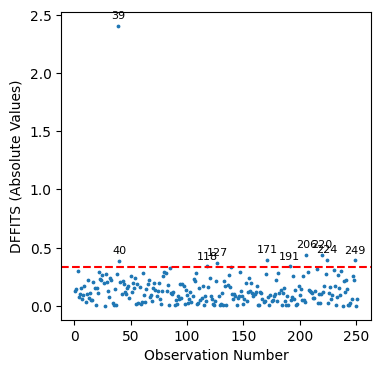

In [15]:
# DFFITS
bodyfat['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(bodyfat.index, 
            np.abs(bodyfat['dffits']), 
            s = 3)
threshold = 2 * np.sqrt(len(res.params) / len(bodyfat))
plt.axhline(y = threshold, 
            color = 'r', 
            linestyle = 'dashed')
influential_points = bodyfat[np.abs(bodyfat['dffits']) > threshold]
for i in influential_points.index:
    plt.annotate(str(i), 
                 (i, np.abs(bodyfat['dffits'][i])), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center', 
                 fontsize=8)
plt.show()


Both of them have a definite outlier at observation 39. There are some other points that fall above the red line on each but they aren't clustered, so they are probably still reasonable.

#### 19. If you identified at least one influential point, identify the observation number(s), and print out the observation's data. Compare that data to a summary of the entire data set. Does the observation(s) have any extreme values for one or more of the predictor variables? In other words, what do you think makes this observation different or "influential" compared to the other points? [2 points]

In [16]:
outliers_dffits = bodyfat[np.abs(bodyfat['dffits']) > 2 * np.sqrt(len(res.params) / len(bodyfat))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits', 
                                                     ascending = True)
outliers_dffits_sorted.iloc[:, :7]

,brozek,age,weight,height,neck,chest,abdom
row,,,,,,,
39,33.8,46,363.15,72.25,51.2,136.2,148.1
220,12.7,54,153.25,70.50,38.5,99.0,91.8
171,1.9,35,125.75,65.50,34.0,90.8,75.0
224,11.3,55,179.75,68.75,41.1,106.9,95.3
249,28.3,72,186.75,66.00,38.9,111.1,111.5
40,33.1,45,262.75,68.75,43.2,128.3,126.2
191,36.5,42,244.25,76.00,41.8,115.2,113.7
118,25.1,40,191.00,74.00,38.3,95.4,92.4
127,17.4,43,152.25,67.75,37.5,95.9,78.0


In [17]:
bodyfat.iloc[:, :7].describe()

,brozek,age,weight,height,neck,chest,abdom
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,18.889243,44.864542,178.828486,70.320717,37.983267,100.768526,92.494024
std,7.726733,12.623057,29.408329,2.606382,2.431748,8.400762,10.759625
min,0.000000,22.000000,118.500000,64.000000,31.100000,79.300000,69.400000
25%,12.800000,35.500000,158.750000,68.375000,36.400000,94.300000,84.550000
50%,19.000000,43.000000,176.250000,70.000000,38.000000,99.600000,90.900000
75%,24.550000,54.000000,196.875000,72.250000,39.400000,105.300000,99.200000
max,45.100000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000


The observation 39 is about average in everything in everything but weight which must be why it is an outlier.

#### 20. (R) Additional predictor variables are not required (no diagnostic tools - just think about the variables you have and if there are other variables you think would help predict the response). [1 point]

Based on the existing variables and their relationships with body fat percentage, additional predictor variables could improve the model's predictive power. Factors related to muscle mass would likely enhance the model’s accuracy in estimating body fat without requiring the underwater weighing technique. But, with the current comprehensive amount of predictors given, we should have enough the make an assumption.

#### 21. No multicollinearity: for this assumption, compute the variance inflation factors (VIFs) and compare the VIFs to your comments in questions 5. Do the variance inflation factors match your assumptions from questions 5? Is this assumption met? [2 points]

In [18]:
# Variance Inflation Factors (VIF)
bodyfat_vifs = pd.DataFrame()
bodyfat_vifs['Feature'] = X.columns[1:]
bodyfat_vifs['VIF'] = [vif(X, i) for i in range(1, len(X.columns))]

print("Max = ", max(bodyfat_vifs['VIF']))
print("Mean = ", np.mean(bodyfat_vifs['VIF']))
bodyfat_vifs

Max =  19.128776884558444
Mean =  7.630139845755153


,Feature,VIF
0,age,1.510958
1,weight,19.128777
2,height,2.306983
3,neck,3.545106
4,chest,8.604128
5,abdom,10.684888


The VIF value for weight is really high at 19.128 and definitely something to be concerned about. Otherwise, the predictor variables are acceptable in terms of multicollinearity, but abdomen and chest should also be investigated further to ensure robust model performance and reliable coefficient estimates.

### Note: your next homework assigment will use this same data set, and you will be asked to fix the assumptions that were broken.

#### 22. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways. [2 points]


The purpose of this data set and analysis is to develop a simpler method for estimating body fat percentage without using the complex underwater weighing technique. By analyzing various body measurements such as age, weight, height, and body circumferences, we aim to create a predictive model for body fat percentage.

From the analysis, we learned that certain measurements, like abdominal circumference, are strong predictors of body fat percentage. However, we also identified some issues with multicollinearity, where some variables are highly correlated with each other, which can affect the reliability of the model. Additionally, we found a few influential data points that significantly impact the model's performance. Overall, the model explains about 71.5% of the variability in body fat percentage, indicating a fairly strong predictive capability.